In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data1 = pd.read_csv("dataset1.csv")
data2 = pd.read_csv("dataset2.csv")
data3 = pd.read_csv("dataset3.csv")

In [9]:
data1

F0        F1         F2         F3  LABEL
0   -2.182270  8.795186   5.469284  -0.237966      0
1    3.698693  3.215945 -10.741661  10.535512      2
2   -7.254824 -7.197825  -7.556684   7.881214      1
3   -3.186120  9.625962   5.670878   2.904450      0
4    2.279499  3.920786  -9.580430   9.072586      2
..        ...       ...        ...        ...    ...
995 -6.423739 -4.715107  -9.481846   8.251363      1
996  1.512494  4.195893 -12.076637   8.739949      2
997  3.123122  5.222823  -9.056304   9.759858      2
998  1.133059  5.116752  -8.712263  10.870868      2
999  1.165802  4.259122 -10.852809   7.605091      2

[1000 rows x 5 columns]

In [14]:
X1 = data1.iloc[:,:-1]
X2 = data2.iloc[:,:-1]
X3 = data3.iloc[:,:-1]
y1 = data1["LABEL"]
y2 = data2["LABEL"]
y3 = data3["LABEL"]

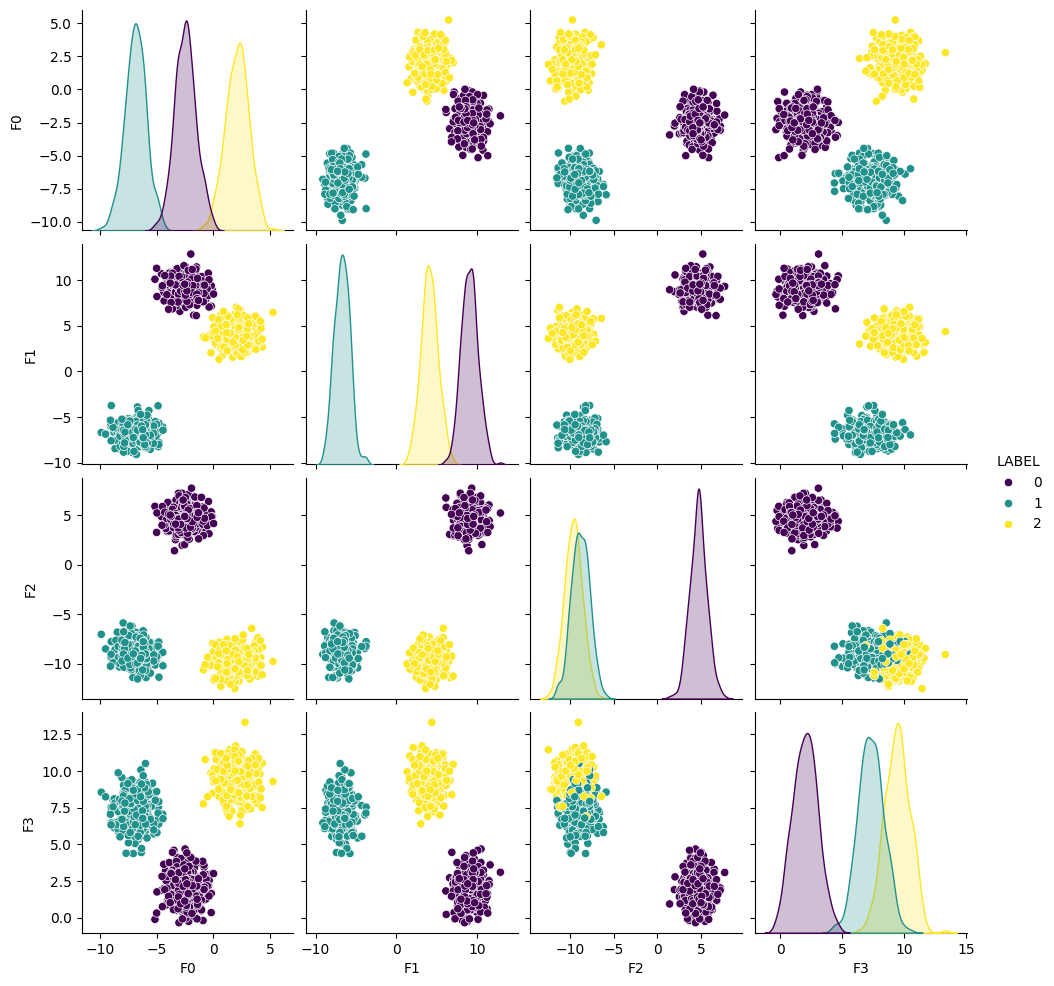

In [16]:
sns.pairplot(data1, hue="LABEL", palette='viridis')

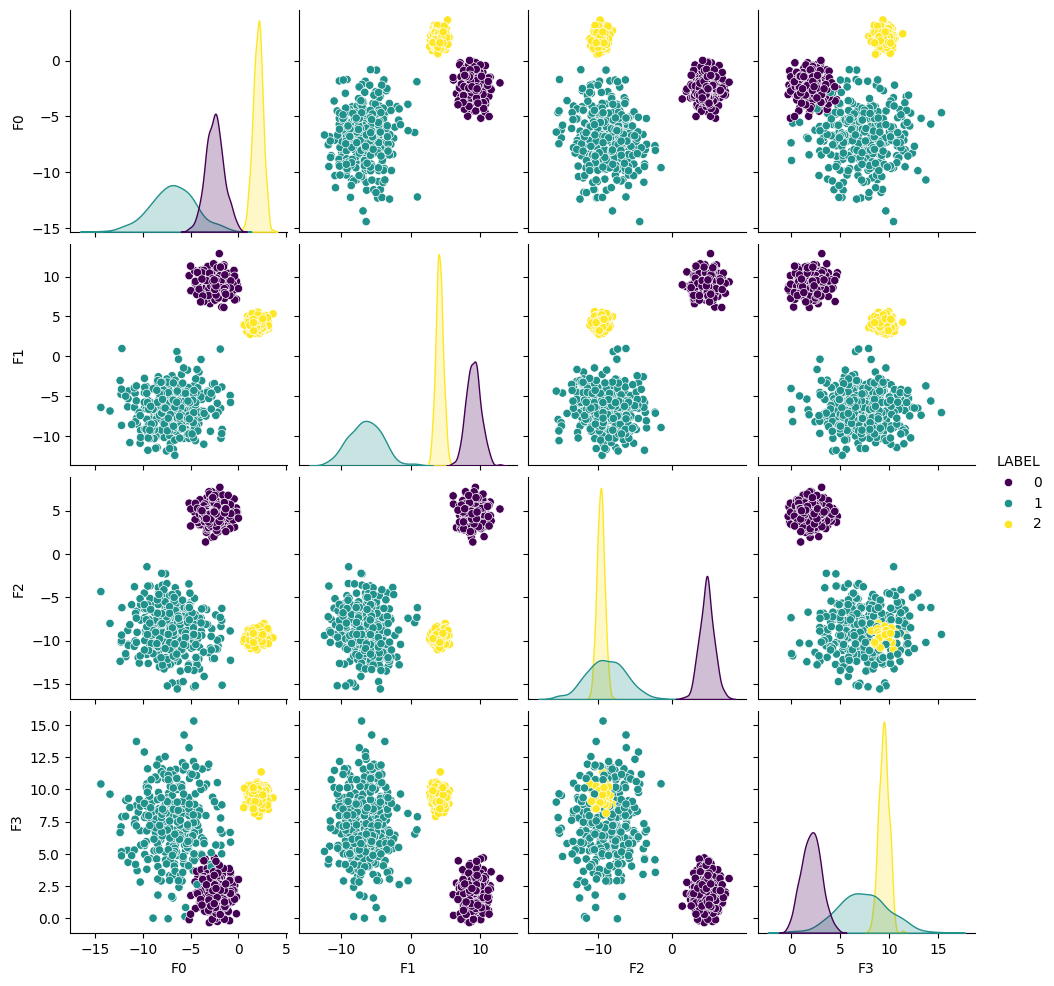

In [17]:
sns.pairplot(data2, hue="LABEL", palette='viridis')

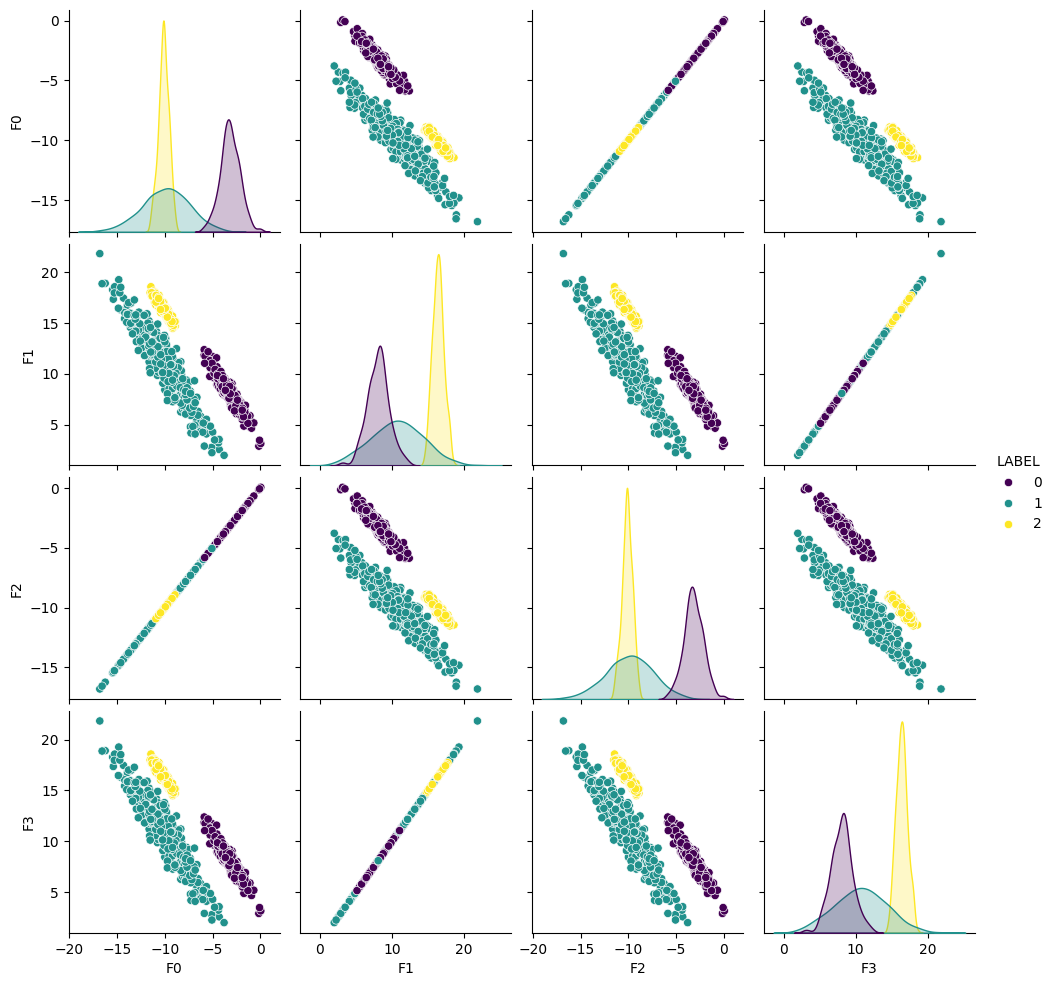

In [18]:
sns.pairplot(data3, hue="LABEL", palette='viridis')

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X1)
kmeans.cluster_centers_

array([[ 2.08128181,  4.08135021, -9.6546176 ,  9.43829232],
       [-2.47972233,  9.03626136,  4.68100968,  2.02428364],
       [-6.8836951 , -6.74468537, -8.85281957,  7.31515829]])

In [38]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X2)
print(kmeans.labels_[:25])
print(y2.values[:25])

[1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0]
[0 2 1 0 2 0 1 0 1 2 0 1 0 0 0 0 0 0 2 0 1 2 1 0 1]


In [71]:
kmeans.labels_[y2==2].mean()

0.0

In [32]:
from scipy.cluster.hierarchy import linkage, fcluster

In [70]:
Z = linkage(X2, method='complete')
clusters = fcluster(Z, t=2, criterion='maxclust')
print(clusters[:25])
print(y2.values[:25])

[2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 1]
[0 2 1 0 2 0 1 0 1 2 0 1 0 0 0 0 0 0 2 0 1 2 1 0 1]


In [65]:
clusters[y2==0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [47]:
clusters[y2==2].mean()

2.0

In [50]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 666]
 [  1 334]]


In [51]:
unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  1 333]
 [  2 667]]


In [52]:
data4 = pd.read_csv("dataset4.csv")
data4

F0         F1         F2         F3  LABEL
0    -1.499212   5.202552  -1.499212   5.202552      0
1   -10.027096  16.292373 -10.027096  16.292373      2
2    -8.609967   9.453919  -8.609967   9.453919      1
3    -3.611808   9.100601  -3.611808   9.100601      0
4    -9.950580  16.051347  -9.950580  16.051347      2
..         ...        ...        ...        ...    ...
995 -13.190091  17.275747 -13.190091  17.275747      1
996 -10.931399  17.065624 -10.931399  17.065624      2
997  -9.941240  16.463917  -9.941240  16.463917      2
998 -10.647363  17.416278 -10.647363  17.416278      2
999 -10.445516  16.329600 -10.445516  16.329600      2

[1000 rows x 5 columns]

In [54]:
X4 = data4.iloc[:,:-1]
y4 = data4["LABEL"]

In [55]:
from sklearn.cluster import DBSCAN

In [58]:
clustering = DBSCAN(eps=0.3, min_samples=10).fit(X4)
unique, counts = np.unique(clustering.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1 484]
 [  0 300]
 [  1  50]
 [  2 136]
 [  3   9]
 [  4  10]
 [  5  11]]


In [59]:
clustering = DBSCAN(eps=1.5, min_samples=8).fit(X4)
unique, counts = np.unique(clustering.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1  16]
 [  0 331]
 [  1 333]
 [  2 320]]


In [72]:
clustering.labels_[y3==0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [64]:
print(y3[clustering.labels_==-1].mean())
print(y3[clustering.labels_==0].mean())
print(y3[clustering.labels_==1].mean())
print(y3[clustering.labels_==2].mean())

0.8125
0.0
2.0
1.0
